# Customer Churn Prediction 
Goal :--> Unerstand data, missing values,distributions, correlations, and initial insights.

In [1]:
# statndar library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load the data from the raw data folder
churn = pd.read_csv(r'C:\first_data_science_proj\customer_churn_prediction\data\raw\churn_Prediction_IBM.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
churn.shape # check the shape of the data

(7043, 21)

In [5]:
churn.info()# check the column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


in this info the totalcharges are in the object type we want to change into the float

In [6]:
churn.isnull().sum() #check for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn.describe().T #get the satistical summary of numerical columns

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
churn.describe(include='all').T # get the statistical summary of all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
churn.duplicated().sum() # check for the duplicate rows

np.int64(0)

<Axes: >

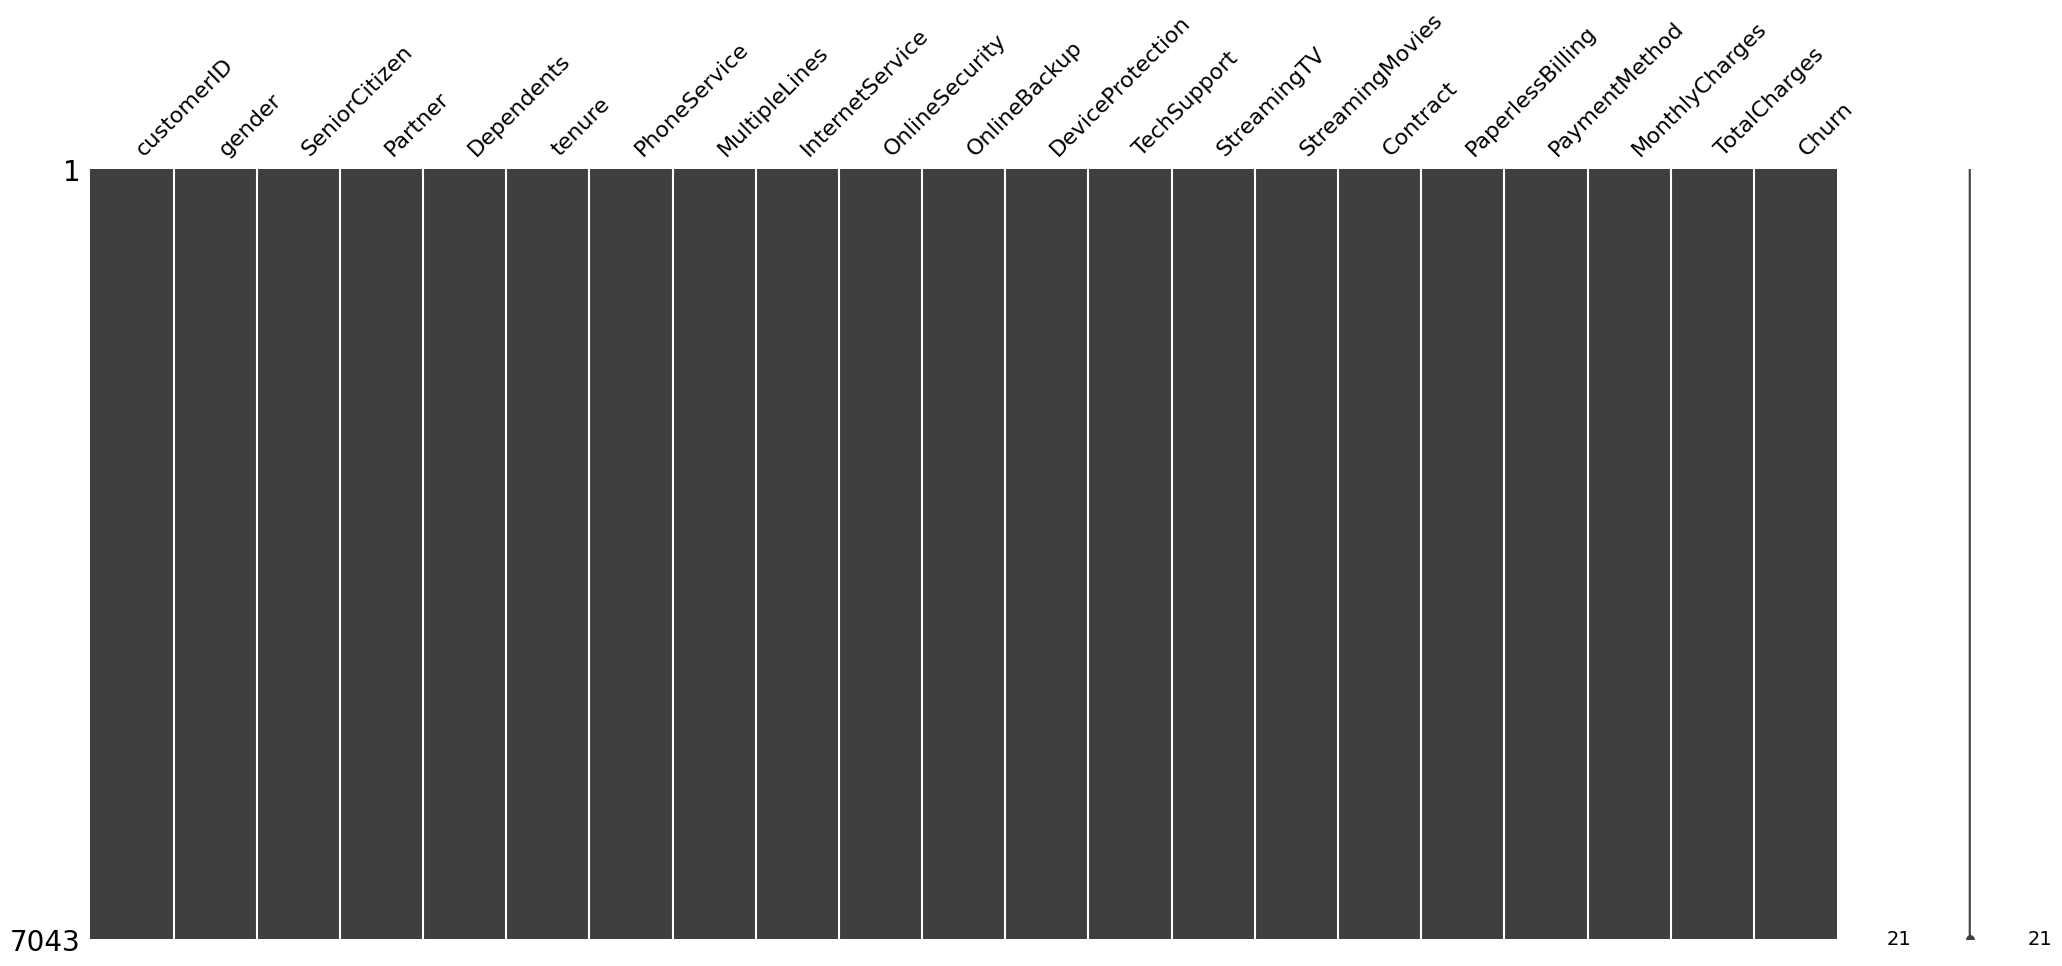

In [10]:
import missingno as msno # visualize missing values
msno.matrix(churn)

Observation:
The missing value matrix shows a clean dataset with no visible gaps.
Confirms the absence of missing data prior to cleaning TotalCharges.

In [11]:
# totalcharges into numeric

churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce') # convert to numeric, coerce errors to NaN


In [ ]:
# Analyze if there is non-numeric data in the 'TotalCharges' column since it's showing as an object instead of float64.
churn.loc[churn['TotalCharges'].isna()==True] # There are 11 rows with spaces in 'TotalCharges' column (features)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Observation:
All 11 customers with missing TotalCharges have tenure = 0, confirming that these missing values are valid and not errors.
These rows can be:filled with 0,or dropped,both are acceptable depending on model choice.

In [13]:
#check unique values in  all columns
for col in churn.columns:
    print(f' Unique {col} is count :{churn[col].nunique()}')
    print(f'{churn[col].unique()}\n')


 Unique customerID is count :7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 Unique gender is count :2
['Female' 'Male']

 Unique SeniorCitizen is count :2
[0 1]

 Unique Partner is count :2
['Yes' 'No']

 Unique Dependents is count :2
['No' 'Yes']

 Unique tenure is count :73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 Unique PhoneService is count :2
['No' 'Yes']

 Unique MultipleLines is count :3
['No phone service' 'No' 'Yes']

 Unique InternetService is count :3
['DSL' 'Fiber optic' 'No']

 Unique OnlineSecurity is count :3
['No' 'Yes' 'No internet service']

 Unique OnlineBackup is count :3
['Yes' 'No' 'No internet service']

 Unique DeviceProtection is count :3
['No' 'Yes' 'No internet service']

 Unique TechSupport is count :3
['No' 'Yes' 'No internet servi

Observation:

All categorical columns show expected number of unique values (mostly 2–3).

Tenure has 73 unique values, confirming it is continuous.

MonthlyCharges has 1585 unique values → continuous variable.

TotalCharges also behaves as a continuous numeric variable after conversion.
No abnormalities found.

In [23]:
numeric_cols=churn.select_dtypes(include=np.number).columns
for cols in numeric_cols:
    q1=churn[cols].quantile(0.25)
    q3=churn[cols].quantile(0.75)
    iqr=q3 - q1
    lower_bound=q1 - 1.5 * iqr
    upper_bound=q3 + 1.5 * iqr
    outliers=churn[(churn[cols] < lower_bound) | (churn[cols] > upper_bound)]
    print(f'Number of outliers in {cols}: {outliers.shape[0]}')

Number of outliers in SeniorCitizen: 1142
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


the seniorcitizen feature values of o and 1 , has 1142 outliers detected using iqr method but it does treated as outliers it is binary value so the iqr assigns the value 1 as outliers

# univariate analysis

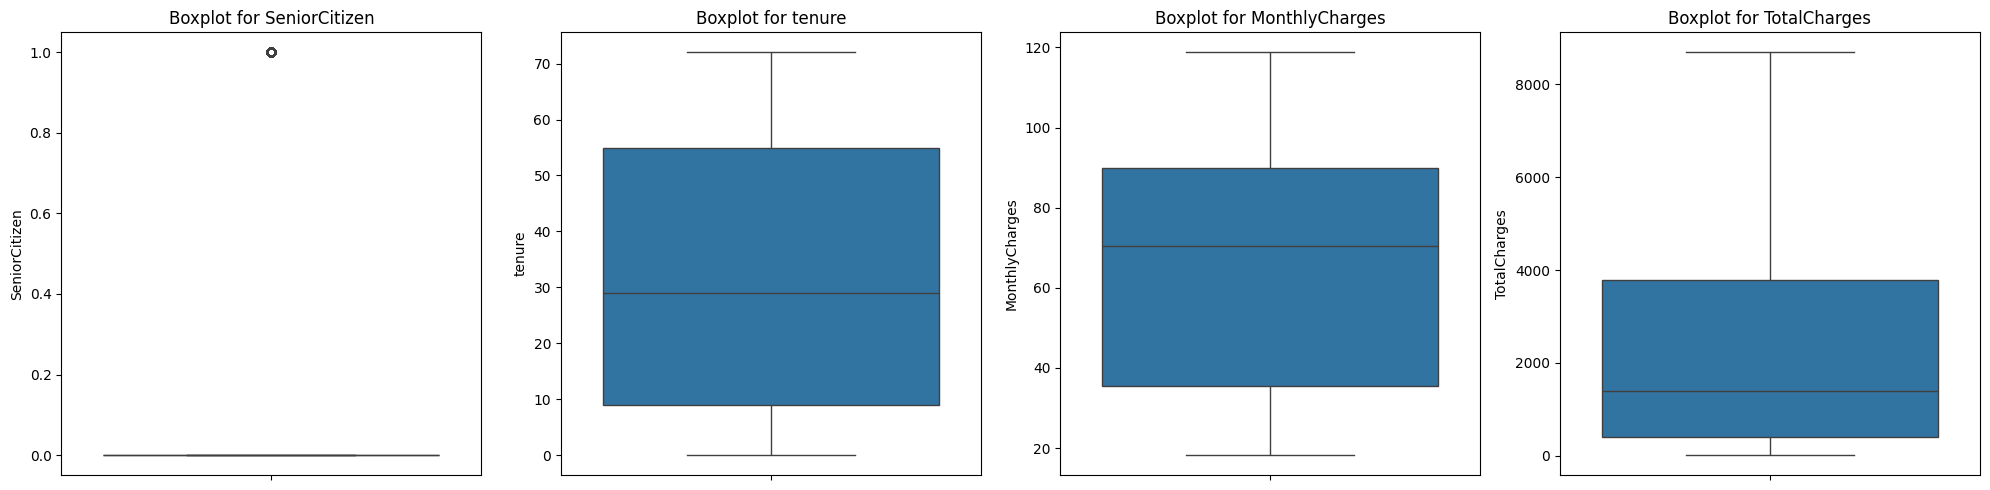

In [14]:
# Visualize boxplots for all numerical columns to check for outliers
numeric_columns=churn.select_dtypes(include=np.number).columns 
n_cols=len(numeric_columns)
fig,axes =plt.subplots(nrows=1, ncols=n_cols, figsize=(5*n_cols,5))
for i ,col in enumerate(numeric_columns):
    sns.boxplot(y=churn[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

SeniorCitizen shows outliers due to binary 0/1 values → this is not a real outlier.

Tenure, MonthlyCharges, TotalCharges show no significant outliers.
Dataset is clean regarding numerical outliers.

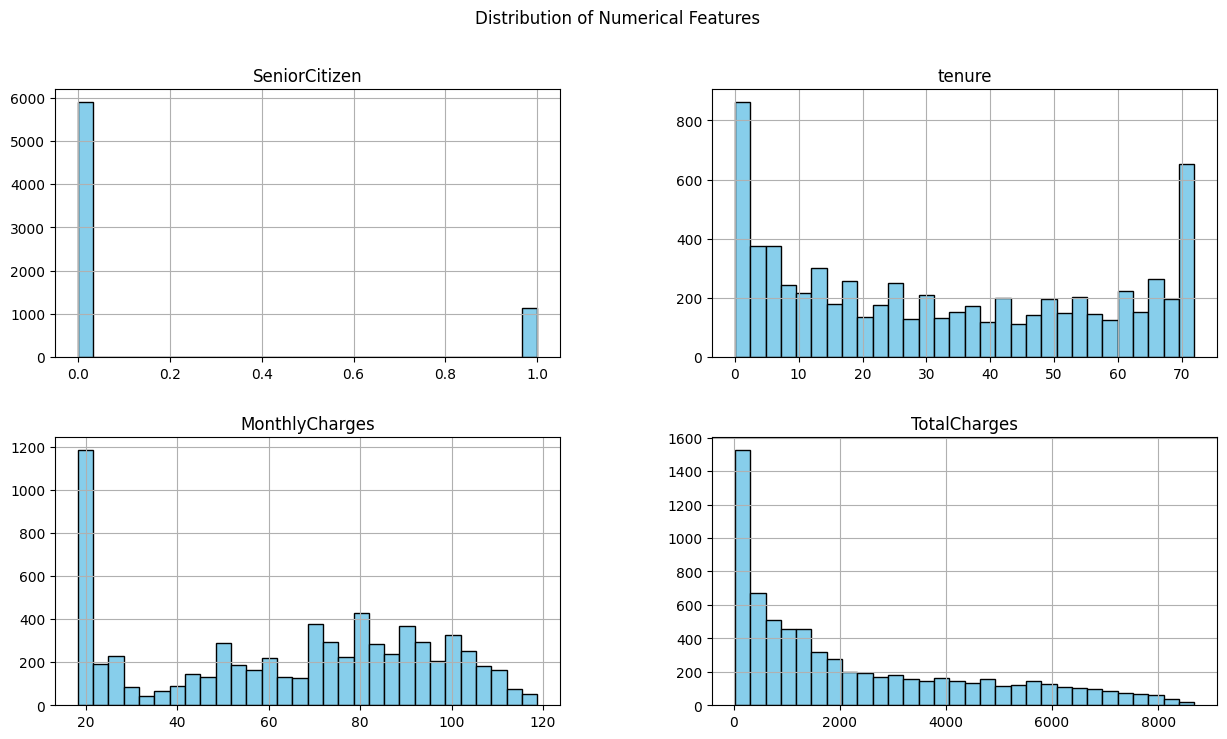

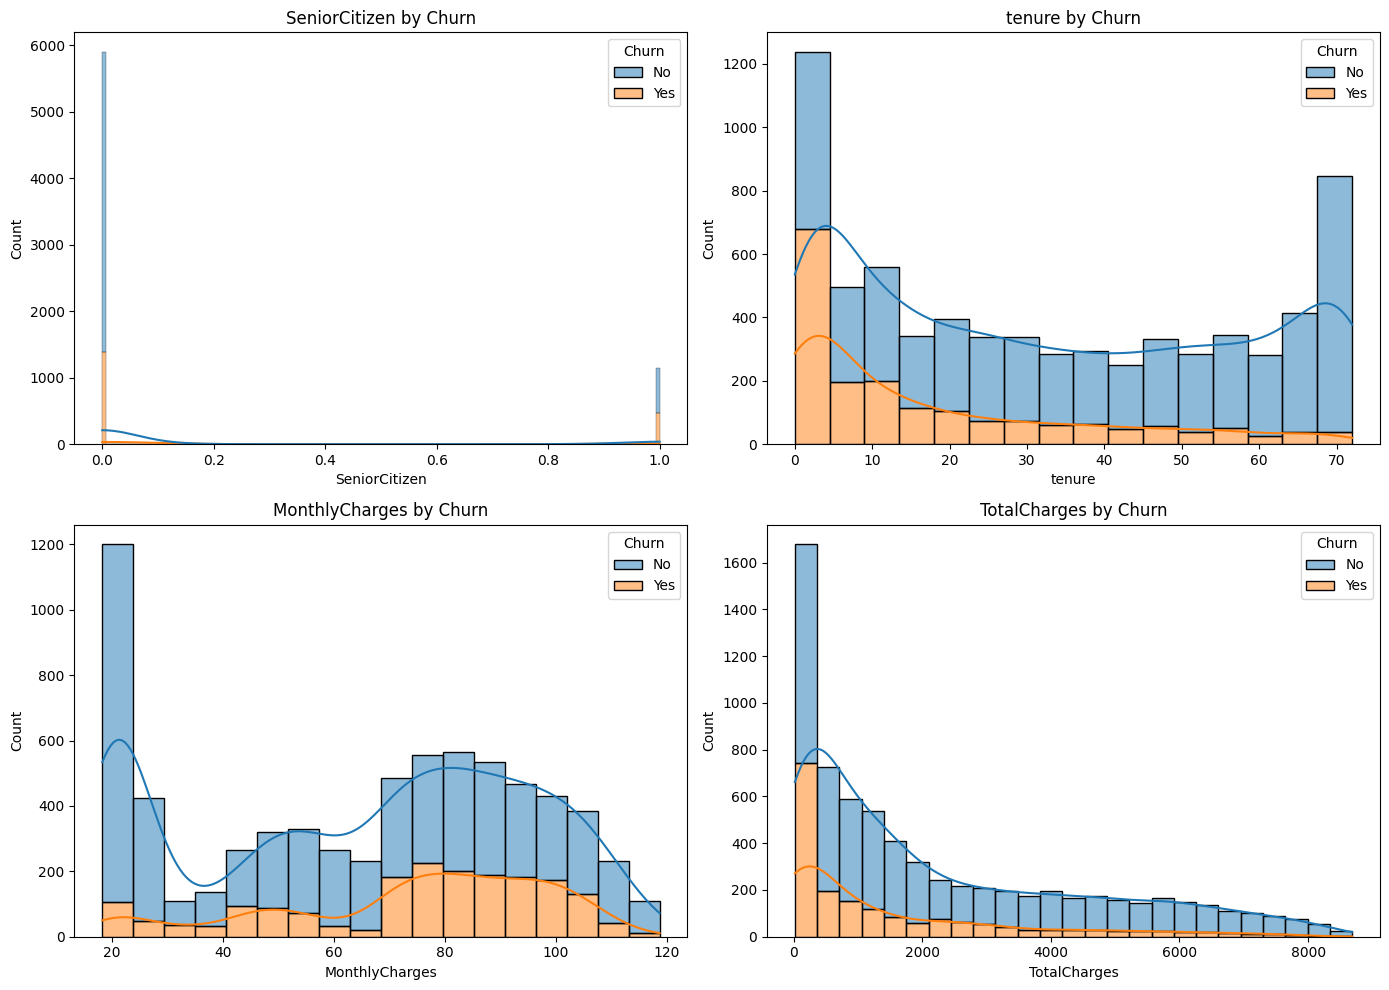

In [21]:
# Initial:--> simple histograms
numerical_cols = churn.select_dtypes(include=np.number).columns
churn[numerical_cols].hist(bins=30, figsize=(15,8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Better: KDE plots
fig, axes = plt.subplots(2,2, figsize=(14,10))
for i, col in enumerate(numerical_cols):
    sns.histplot(data=churn, x=col, kde=True, hue='Churn', multiple='stack', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} by Churn')
plt.tight_layout()
plt.show()

Observation:

Tenure is right-skewed → most customers are new.

MonthlyCharges slightly right-skewed → many low to medium paying customers.

TotalCharges heavily right-skewed → expected due to tenure influence.

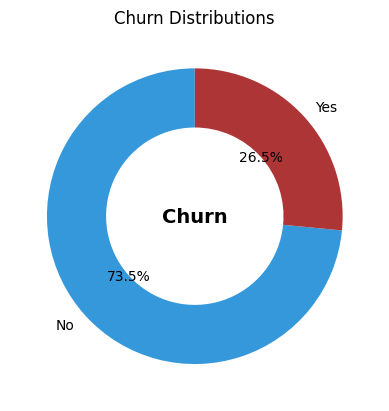

In [18]:
import matplotlib.pyplot as plt

# Count churn values
churn_counts = churn['Churn'].value_counts(normalize=True) * 100
labels = churn_counts.index.tolist()
sizes = churn_counts.values.tolist()
colors = ['#3498db', "#AE3535"]  

# Plot donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90,
       wedgeprops={'width': 0.4}, autopct='%1.1f%%')

# Center label
plt.text(0, 0, 'Churn', ha='center', va='center', fontsize=14, weight='bold')

# Title
plt.title('Churn Distributions')
plt.show()

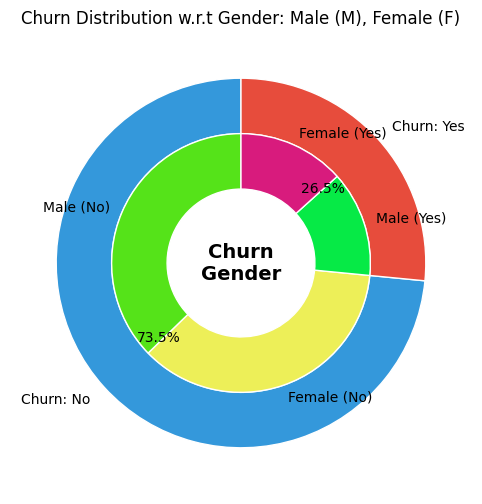

In [22]:
import matplotlib.pyplot as plt


outer_labels = ['Churn: No', 'Churn: Yes']
outer_sizes = churn['Churn'].value_counts().sort_index().values 


inner_labels = ['Male (No)', 'Female (No)', 'Male (Yes)', 'Female (Yes)']
male_no = churn[(churn['Churn'] == 'No') & (churn['gender'] == 'Male')].shape[0]
female_no = churn[(churn['Churn'] == 'No') & (churn['gender'] == 'Female')].shape[0]
male_yes = churn[(churn['Churn'] == 'Yes') & (churn['gender'] == 'Male')].shape[0]
female_yes = churn[(churn['Churn'] == 'Yes') & (churn['gender'] == 'Female')].shape[0]
inner_sizes = [male_no, female_no, male_yes, female_yes]


outer_colors = ['#3498db', '#e74c3c']  
inner_colors = ["#55e319", "#e8eb29c7", "#06ea46", "#d81b7d"]  


fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(outer_sizes, radius=1, labels=outer_labels, colors=outer_colors,
       startangle=90, wedgeprops=dict(width=0.3, edgecolor='white'), autopct='%1.1f%%')

ax.pie(inner_sizes, radius=0.7, labels=inner_labels, colors=inner_colors,
       startangle=90, wedgeprops=dict(width=0.3, edgecolor='white'))

plt.text(0, 0, 'Churn\nGender', ha='center', va='center', fontsize=14, weight='bold')


plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)')
plt.show()

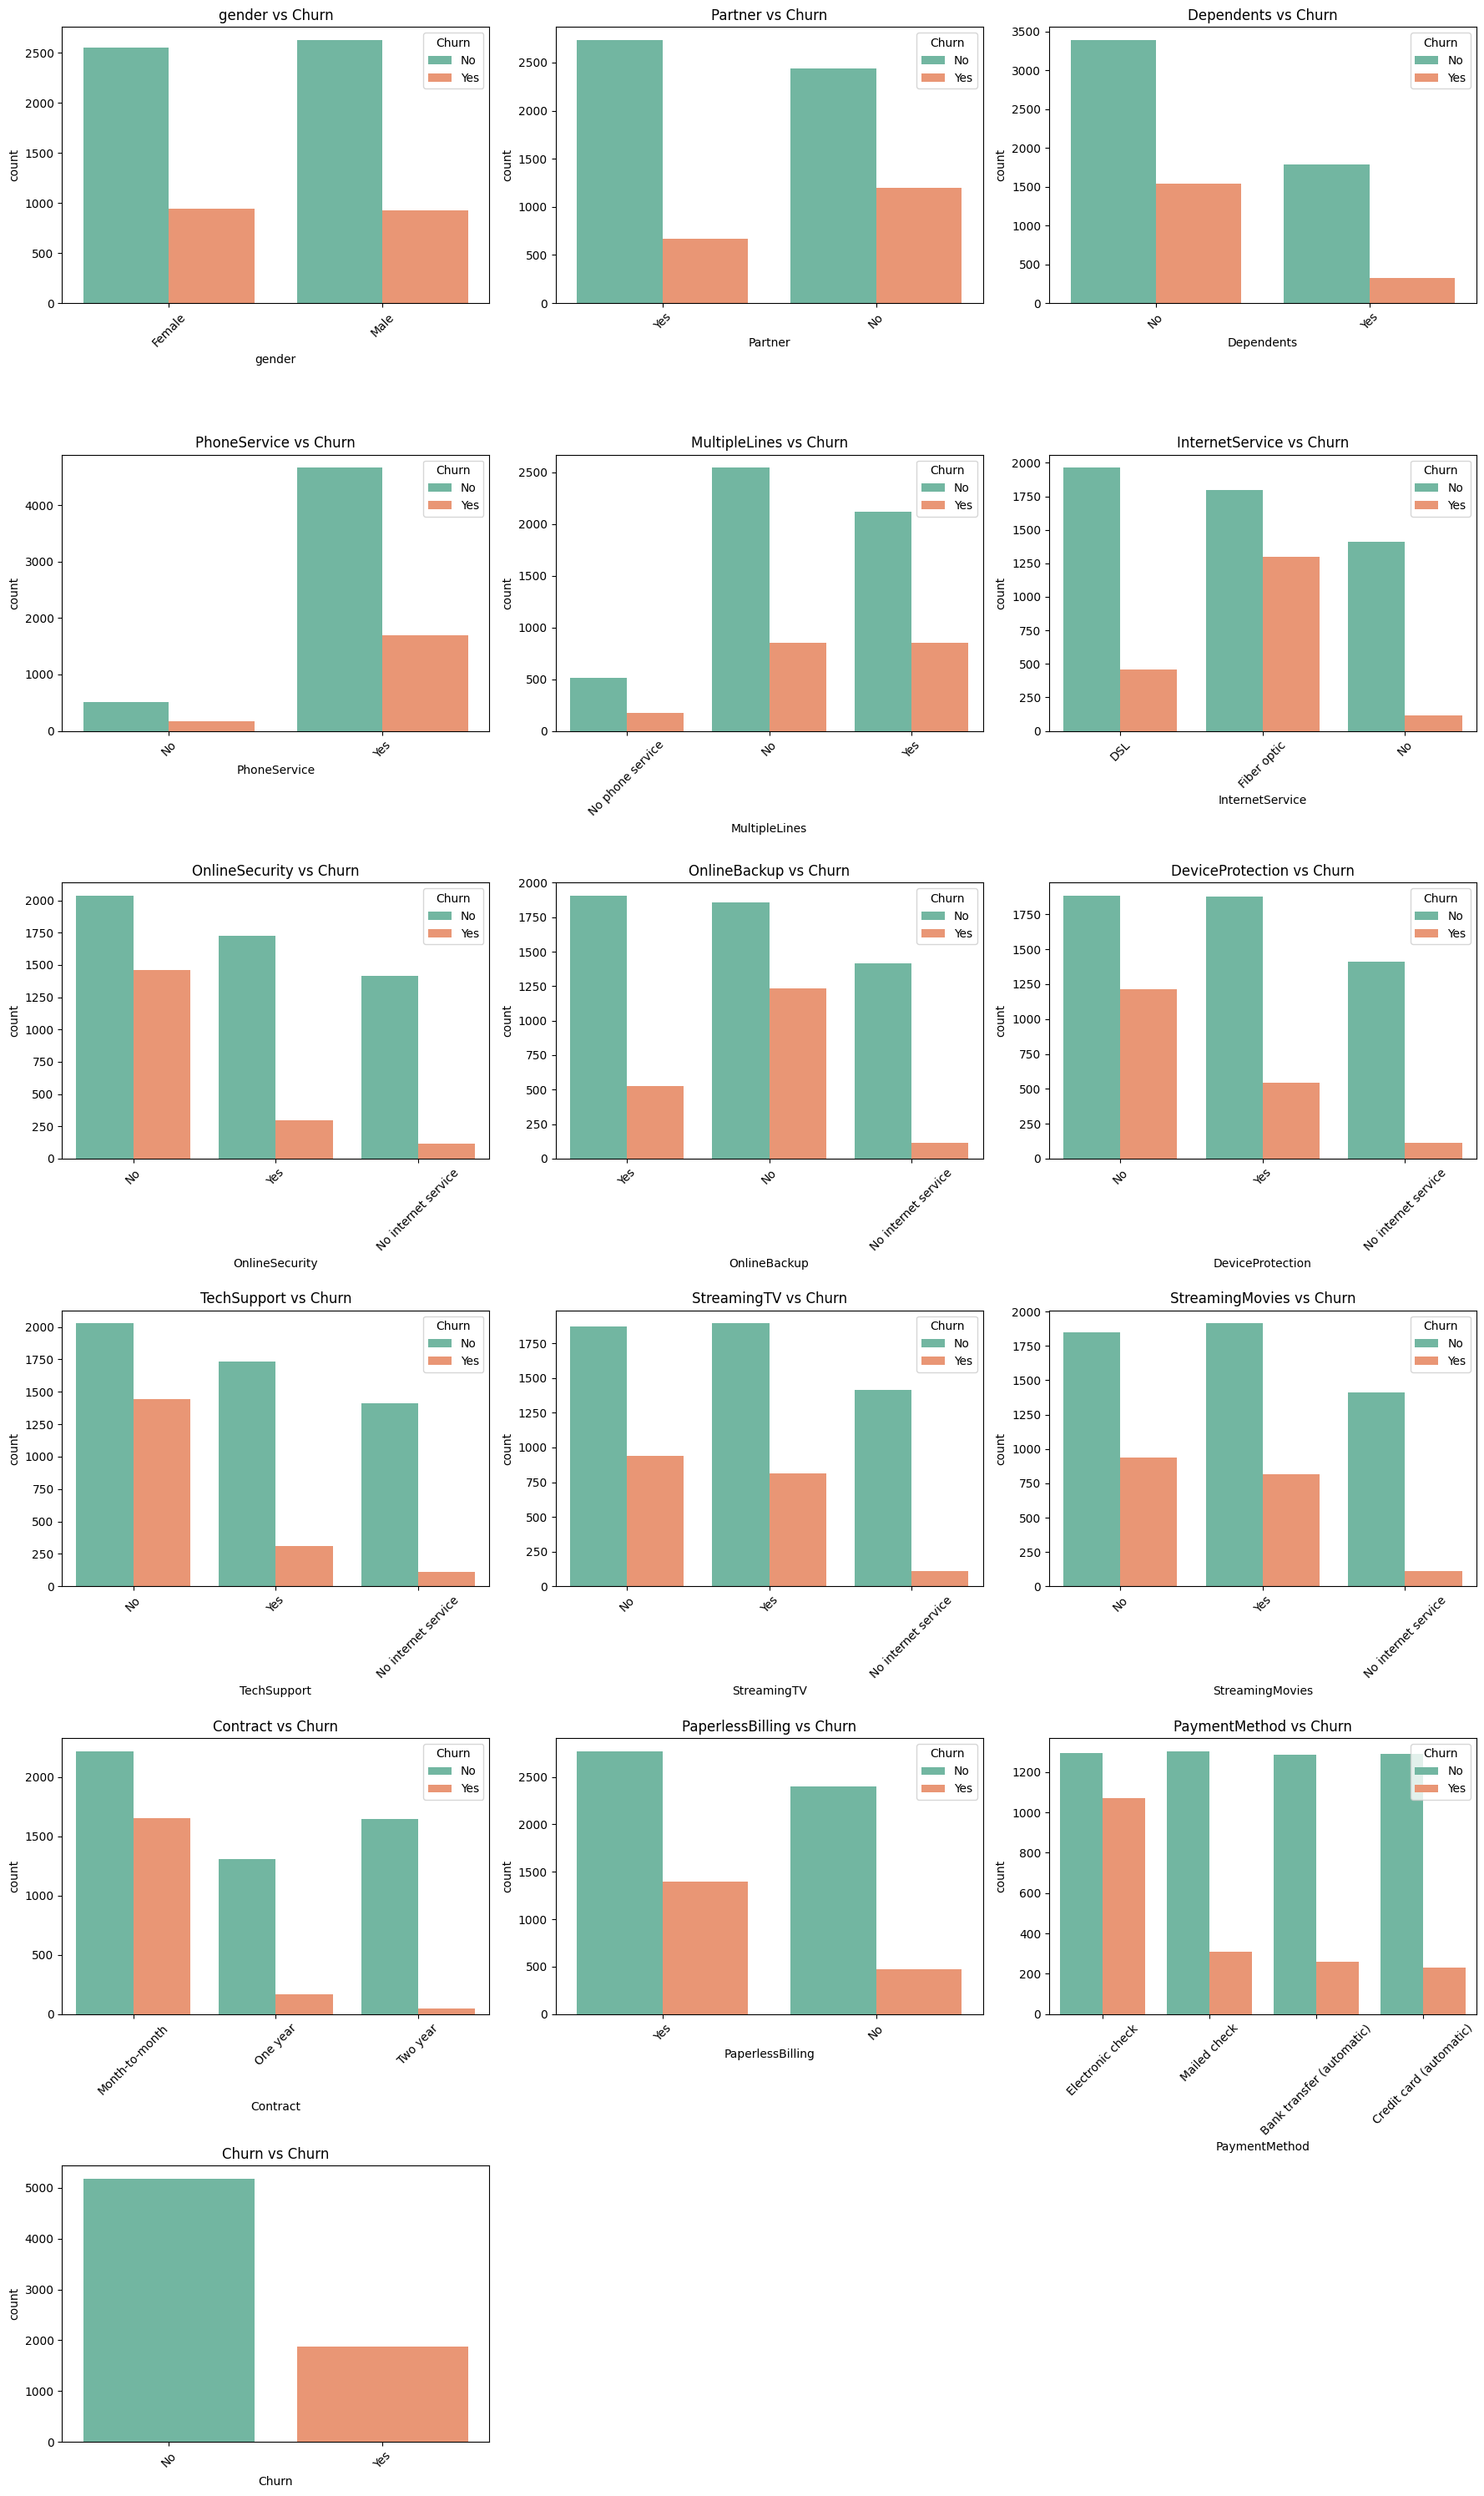

In [ ]:
 # visualize the categorical columns using countplots
categorical_cols=churn.select_dtypes(include='object').columns.drop('customerID')
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5*n_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=churn, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()


Observation:

Many service-related features (OnlineSecurity, OnlineBackup etc.) show imbalanced distributions.

In most service categories, churners appear high where customers lack extra services.
This highlights service bundling importance.

# bivariate analysis by features

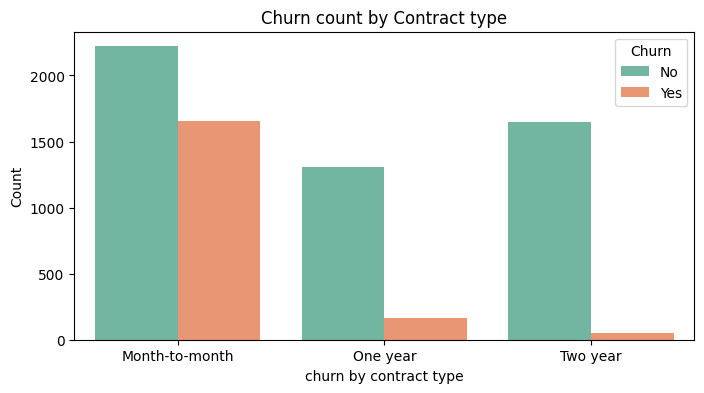

In [ ]:
#churn count by contract type
plt.figure(figsize=(8,4))
sns.countplot(x='Contract', hue='Churn', data=churn , palette='Set2')
plt.title('Churn count by Contract type')   
plt.xlabel('churn by contract type')
plt.ylabel('Count')
plt.grid(False)
plt.show()



Observation:
Customers with Month-to-Month contracts show significantly higher churn.
Customers with One-year/Two-year contracts have lower churn → long-term commitment reduces dropout.

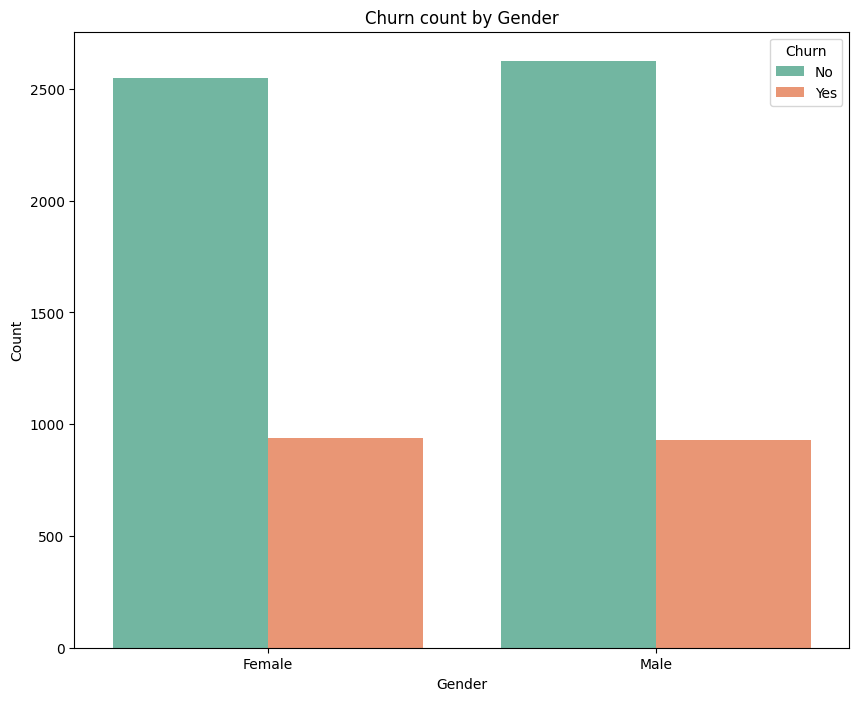

In [ ]:
#churn count by gender
plt.figure(figsize=(10,8))
sns.countplot(x='gender', hue='Churn', data=churn , palette='Set2')
plt.title('Churn count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Observation:
Gender does not significantly impact churn. Both Male and Female have similar churn patterns.

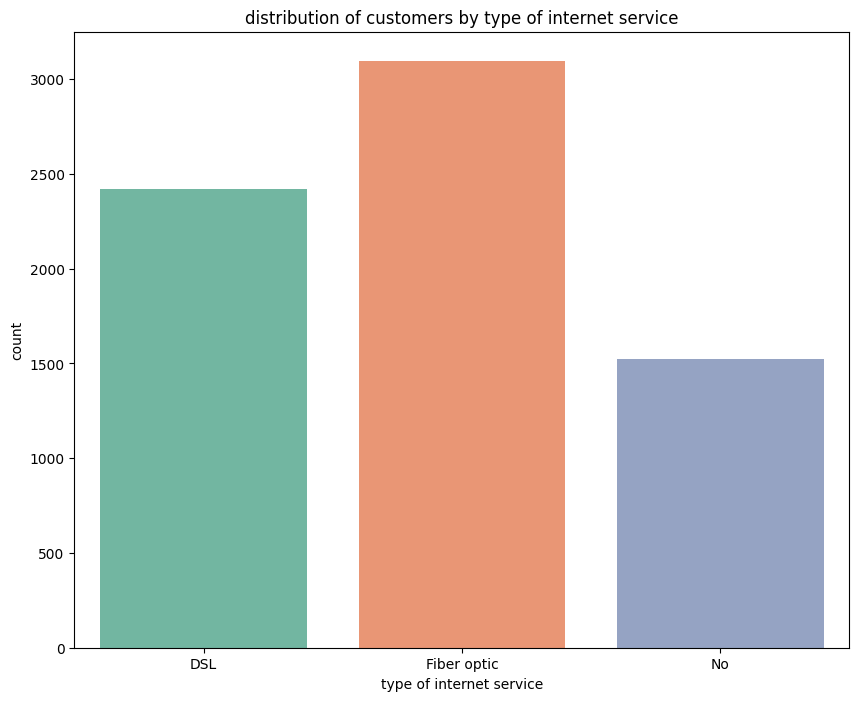

In [ ]:
# distribution of customer by the type of internet service
plt.figure(figsize=(10,8))
sns.countplot(x='InternetService',data=churn , palette='Set2')
plt.title('distribution of customers by type of internet service')
plt.xlabel('type of internet service')
plt.ylabel('count')
plt.grid(False)
plt.show()

Observation:

Fiber Optic is most common.

Fiber Optic customers show higher churn compared to DSL → likely due to high monthly charges.

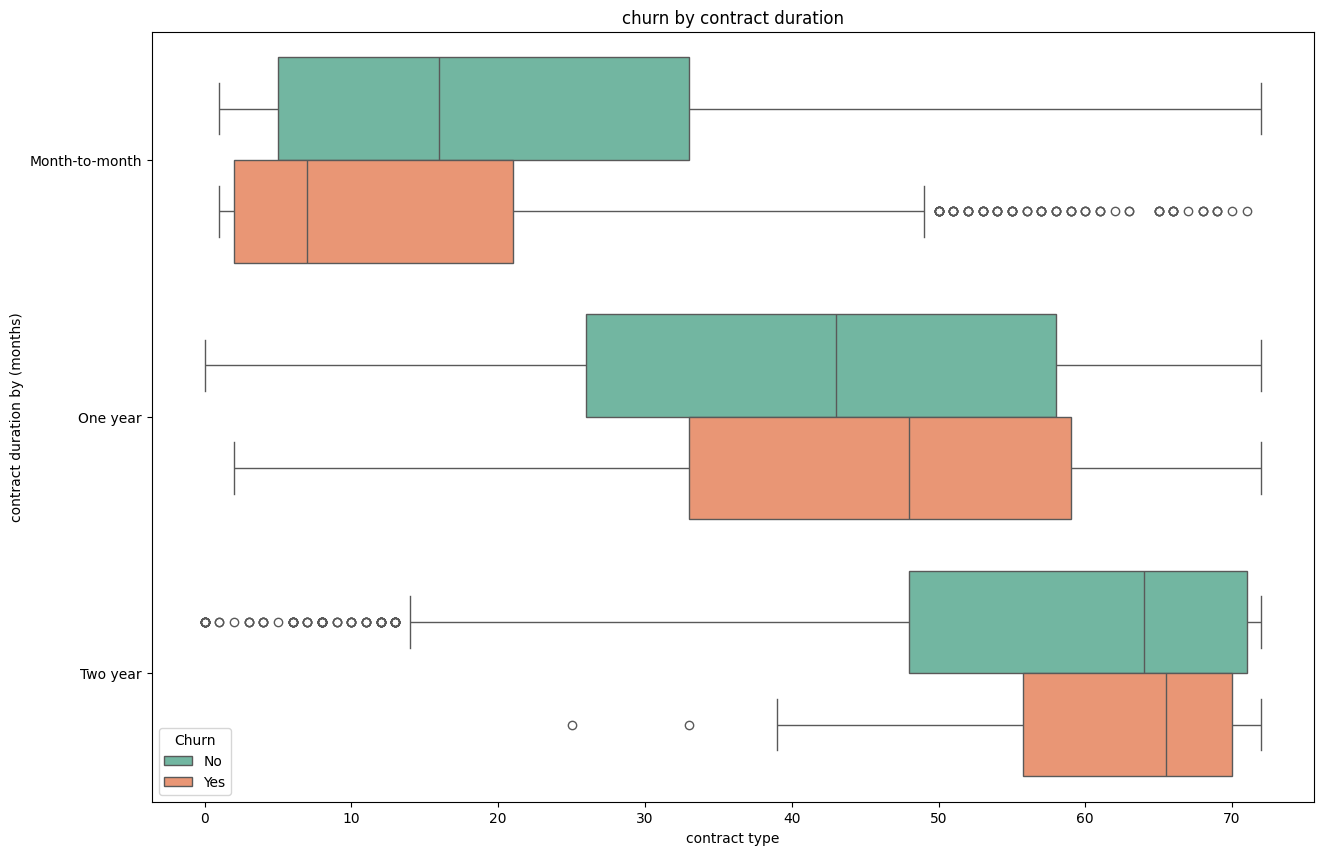

In [ ]:
# churn distribution by contract duration
plt.figure(figsize=(15,10))
sns.boxplot(x='tenure',y='Contract',hue='Churn',data=churn, palette='Set2')
plt.title('churn by contract duration')
plt.xlabel('contract type')
plt.ylabel('contract duration by (months)')
plt.grid('off')
plt.grid(False)
plt.show()

Observation:

Short-tenure customers in Month-to-Month contracts churn heavily.

Long-tenure customers in yearly contracts rarely churn.
Strong retention effect of long-term contracts.

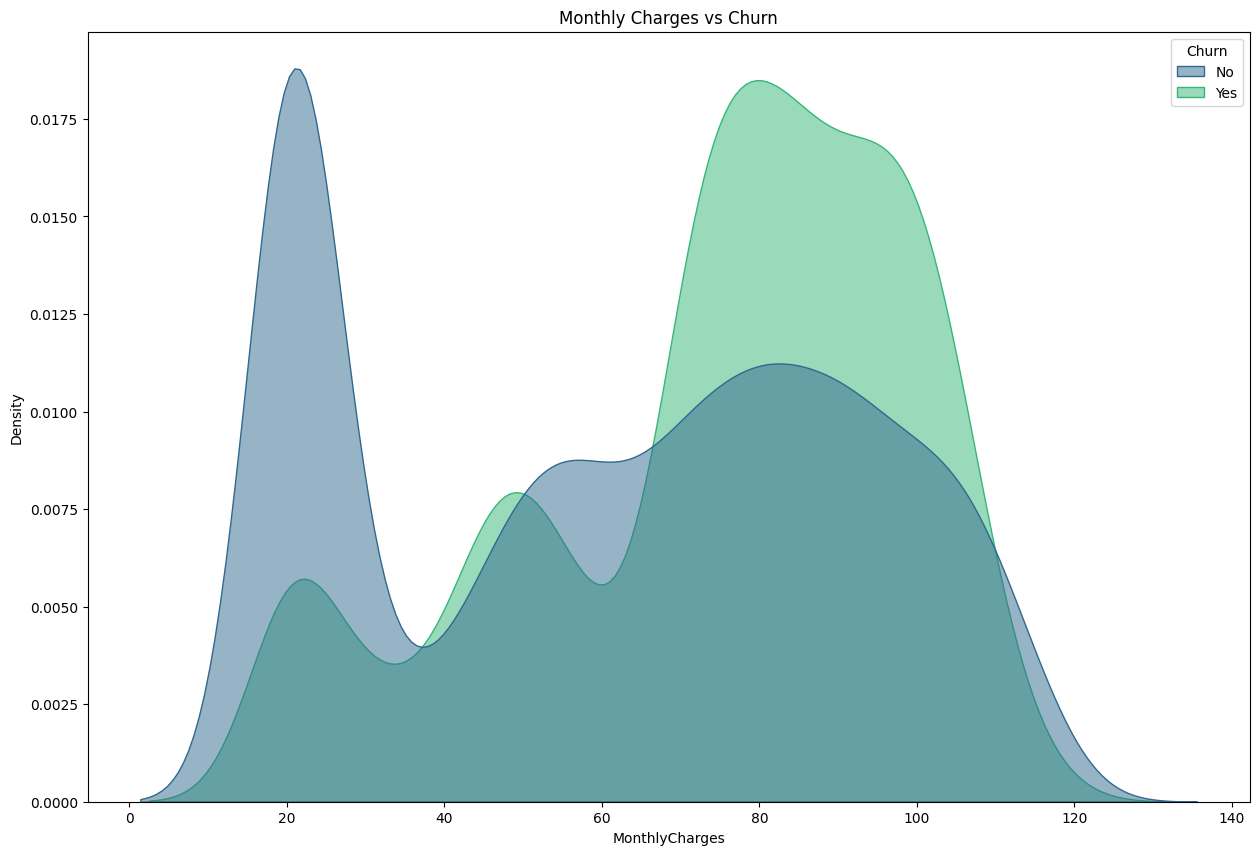

In [ ]:
# monthly charges vs churn
plt.figure(figsize=(15,10))
sns.kdeplot(hue='Churn', x='MonthlyCharges', data=churn, fill=True,common_norm=False,alpha=0.5,palette='viridis')
plt.title('Monthly Charges vs Churn')
plt.show()

Observation:
Churners have a noticeably higher monthly charge density.
Indicates price sensitivity as a churn driver.

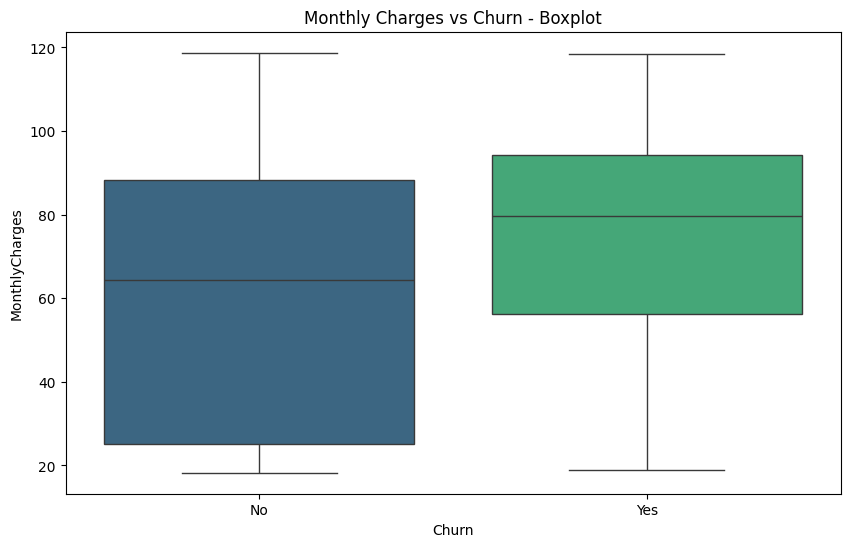

In [ ]:
# monthly charges vs churn in boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn, palette='viridis')
plt.title('Monthly Charges vs Churn - Boxplot')
plt.show()

Observation:
Median MonthlyCharges for churners is higher than non-churners.
Upper whiskers show churn more common among high-bill customers.

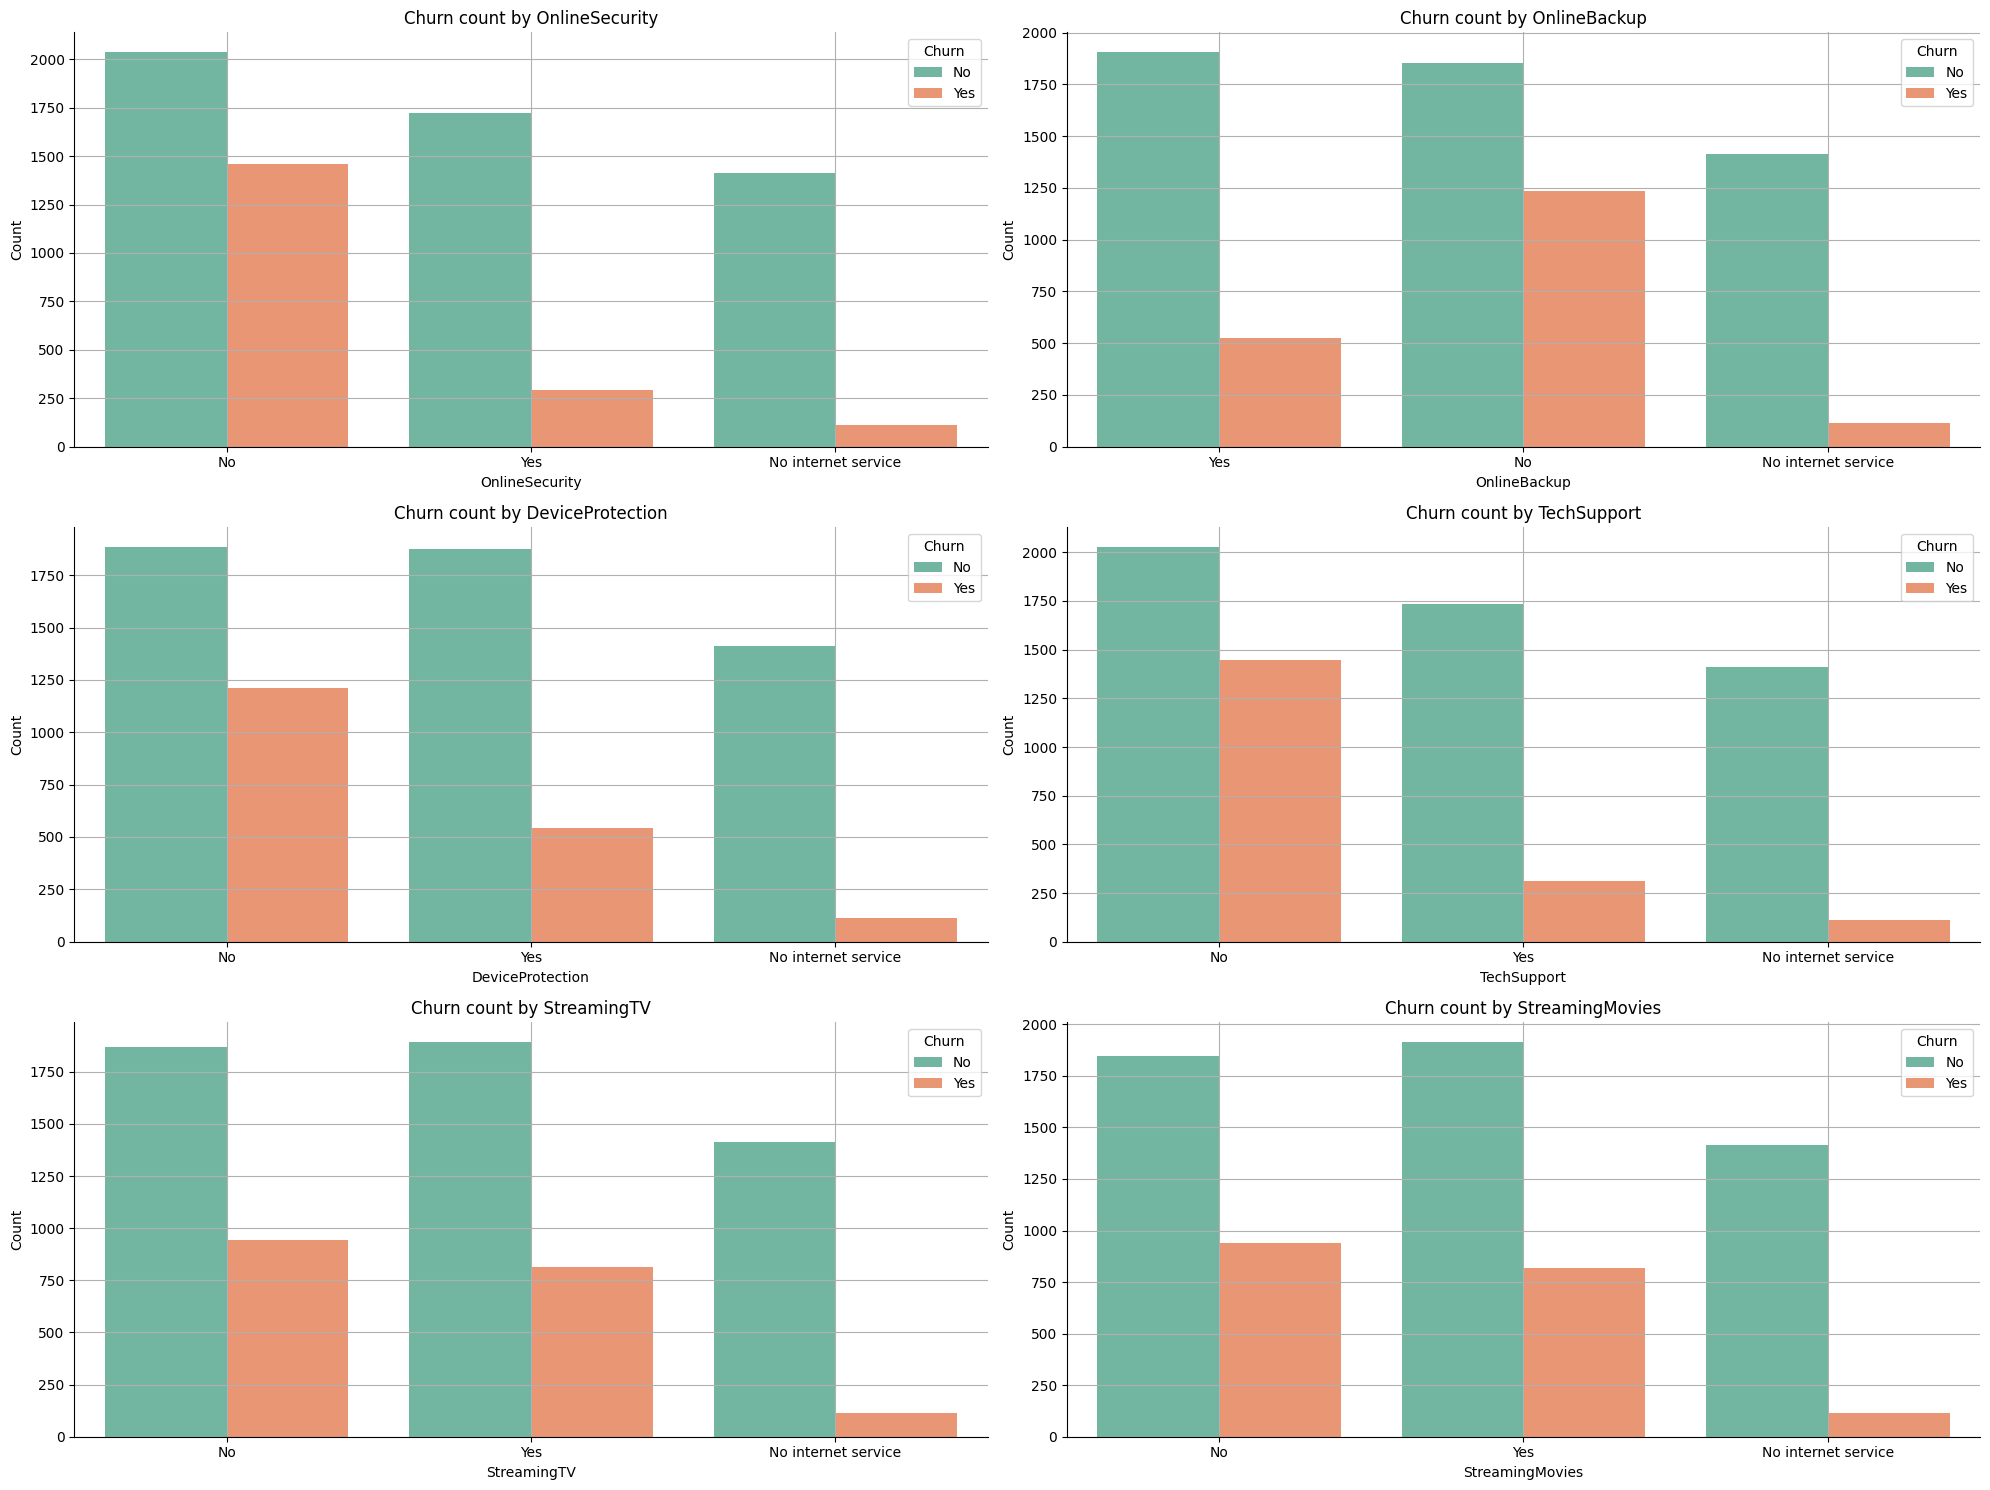

In [ ]:
# churn count by additional services
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize = (20,15))
for i, services in enumerate(additional_services):
    plt.subplot(3,2,i+1)
    sns.countplot(x=services, hue='Churn', data=churn, palette='Set2')
    plt.title(f'Churn count by {services}')
    plt.xlabel(services)
    plt.ylabel('Count')
    plt.grid()
    sns.despine()
plt.tight_layout()
plt.show()

Observation:
For OnlineSecurity, Backup, DeviceProtection, TechSupport:

Customers with No services churn more.

Customers with subscribed services churn less.
Indicates that additional services increase customer stickiness.

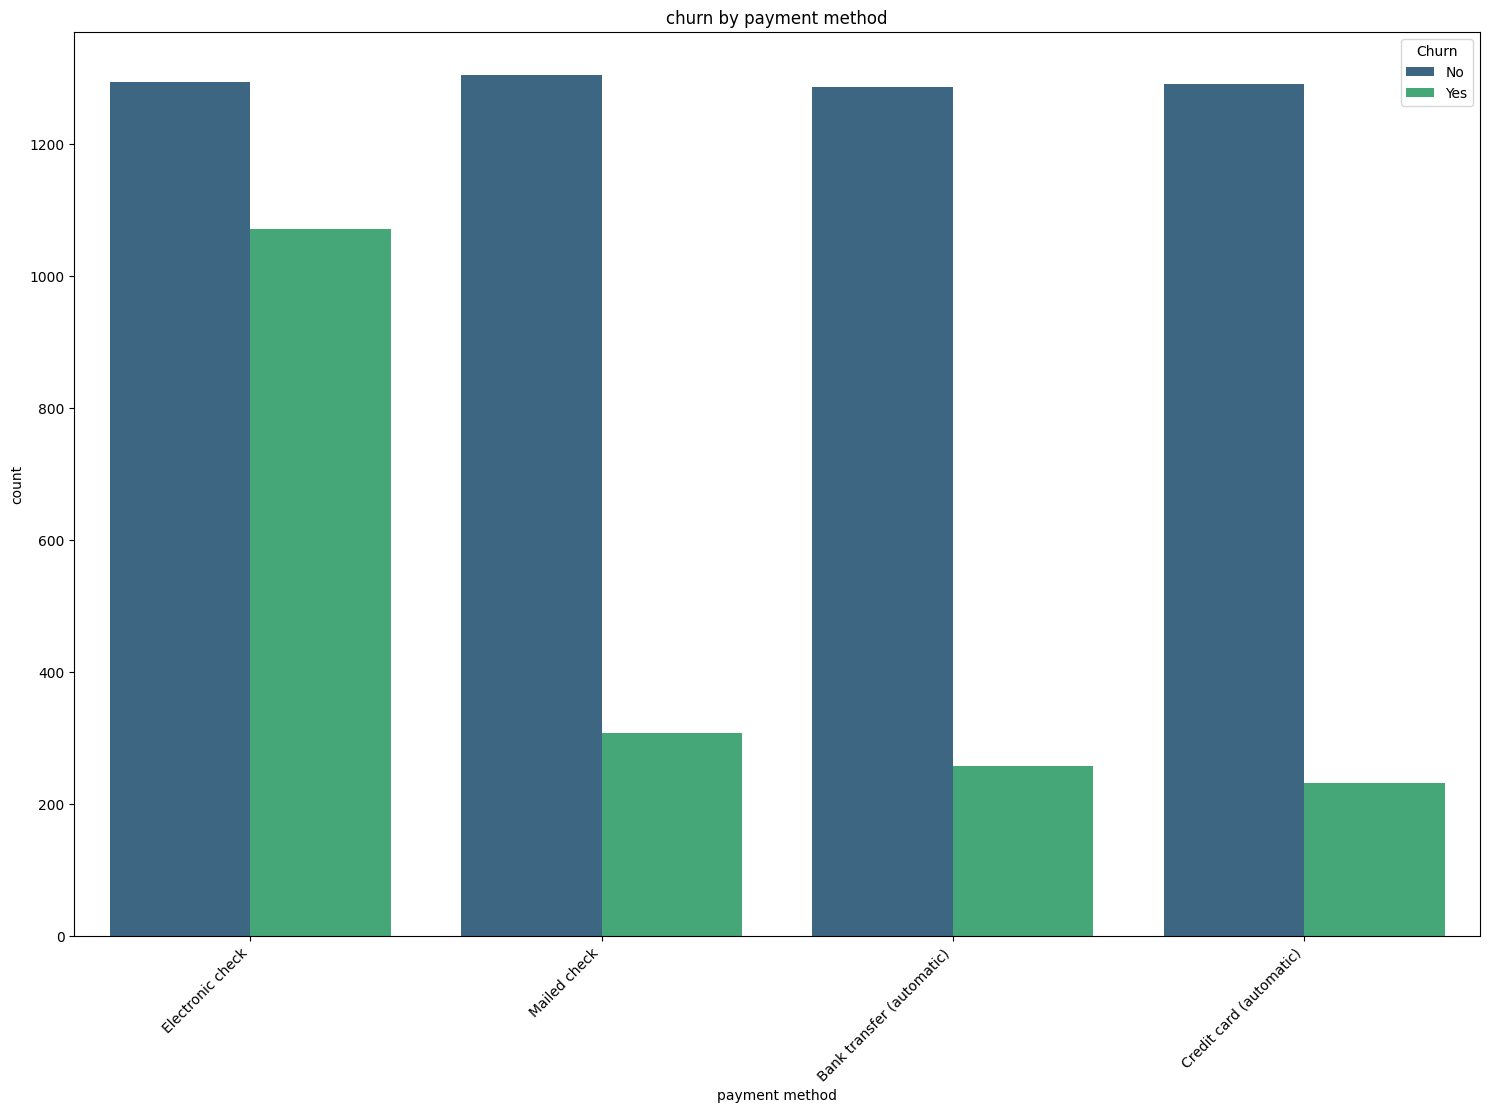

In [ ]:
# churn count by payment method
plt.figure(figsize=(15,10))
sns.countplot(x ='PaymentMethod', hue='Churn', data=churn , palette ='viridis')
plt.title('churn by payment method')
plt.xlabel('payment method')
plt.ylabel('count')
plt.tight_layout()
plt.xticks(rotation=45,ha='right')
plt.show()

Observation:

Electronic Check customers churn the most.

Automatic bank/credit methods correlate with lower churn.
Payment method strongly influences churn behavior.

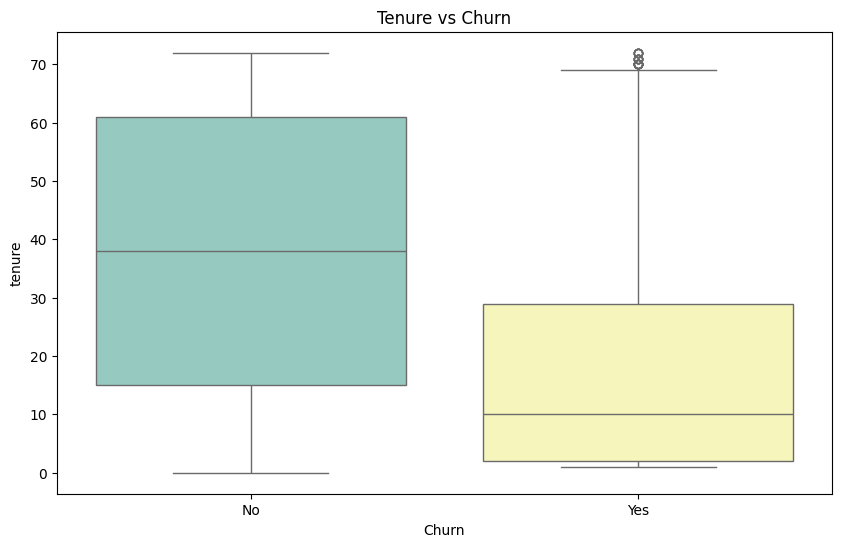

In [ ]:
# tenure vs churn (important)
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=churn, palette='Set3')
plt.title('Tenure vs Churn')
plt.show()

Observation:
Churners have significantly lower tenure. Non-churn customers tend to stay much longer.

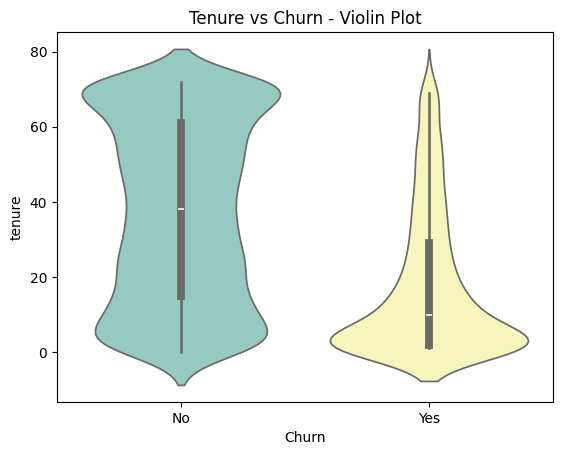

In [ ]:
sns.violinplot(x='Churn', y='tenure', data=churn, palette='Set3')
plt.title('Tenure vs Churn - Violin Plot')
plt.show()

Observation:
The distribution clearly shows churn density high at tenure 0–20 months, dropping sharply for long-tenure customers.

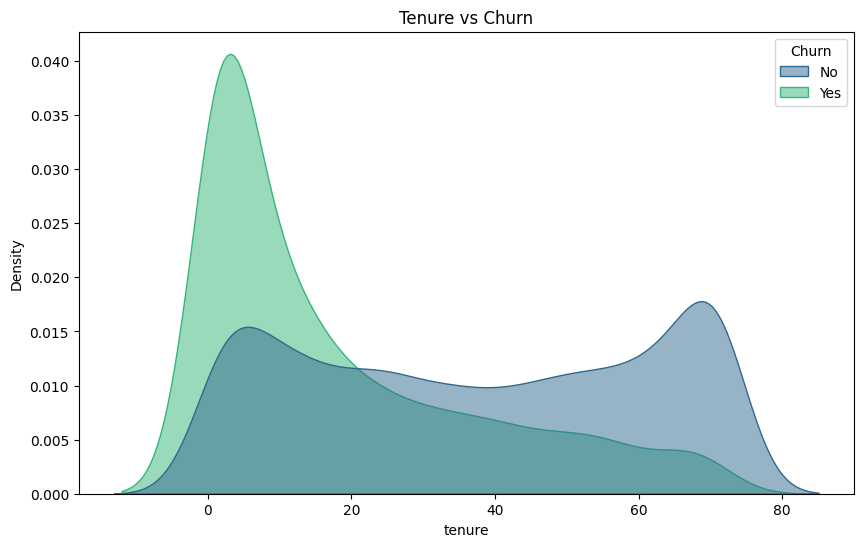

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(hue='Churn', x='tenure', data=churn, fill=True,common_norm=False,alpha=0.5,palette='viridis')
plt.title('Tenure vs Churn')
plt.show()

Observation:
Churn drops dramatically as tenure increases.
Strong negative relationship between tenure and churn.

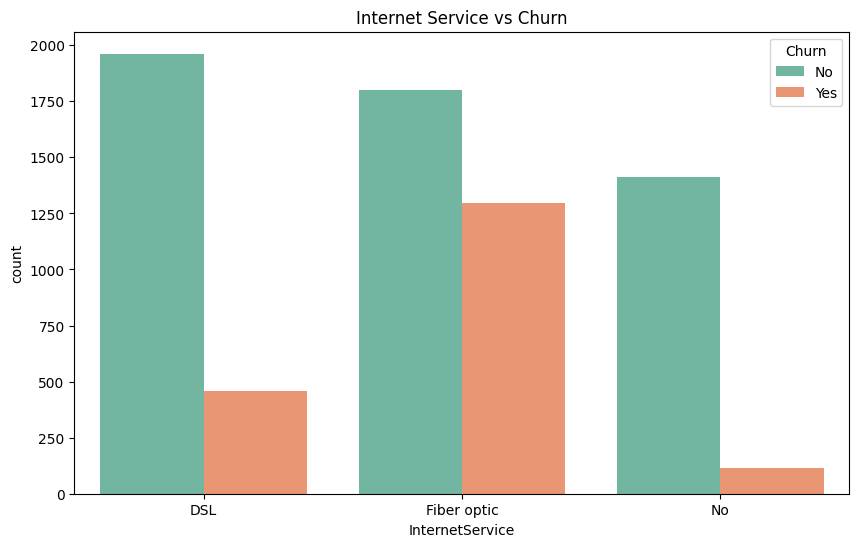

In [ ]:
# internet service vs churn
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService', hue='Churn', data=churn, palette='Set2')
plt.title('Internet Service vs Churn')
plt.show()

Observation:

Fiber optic → high churn.

No internet service → low churn.

DSL → lower churn compared to fiber.
Internet type impacts churn significantly.

# correlation analysis


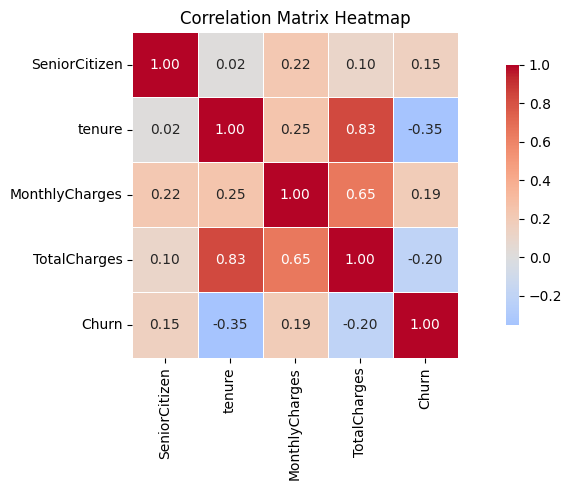

In [ ]:
# correlation analysis using heatmap

churn_corr=churn.copy()
churn_corr['Churn']=churn_corr['Churn'].map({'Yes':1,'No':0})
numeric_cols = churn_corr.select_dtypes(include=np.number).columns
corr_df=churn_corr[numeric_cols]
corr_matrix=corr_df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',center=0,fmt='.2f',linewidths=0.5,square=True,cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Observation:

Tenure has a moderate negative correlation with churn.

MonthlyCharges has weak positive correlation with churn.

TotalCharges highly correlates with tenure (expected).
Most other variables show weak linear correlations → churn depends more on categorical patterns than numerics.